Matias Medrano Ascencio

Jueves 9 de noviembre del 2023

# Actividad - Ecuaciones diferenciales

1. Resolver numéricamente con `solve_ivp` la siguiente ecuación diferencial:
$$\frac{dx}{dt}=\frac{x}{t+1}$$

In [18]:
import numpy as np
from scipy.integrate import solve_ivp, odeint

def f(t, x):
    return x/(t + 1)

tspan = [0, 40]
x0 = np.array([14])

x_ivp = solve_ivp(f, tspan, x0, max_step=0.1)

Grafique con condición inicial $x_0 = 2$

In [19]:
x0 = np.array([2])
x_ivp = solve_ivp(f, tspan, x0, max_step=0.1)

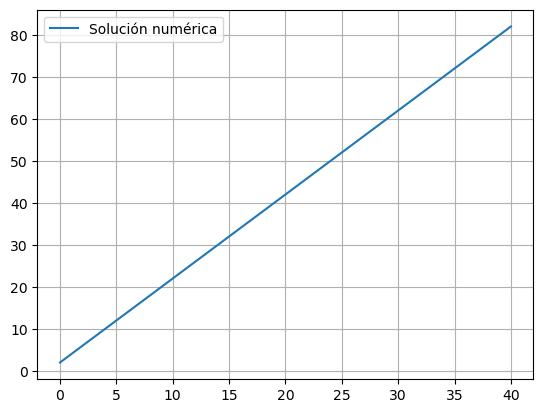

In [20]:
plt.figure()
plt.plot(x_ivp.t, x_ivp.y[0, :], label="Solución numérica")
plt.legend(loc="best")
plt.grid()

2. Encuentre la solución numérica para un oscilador armónico simple:

$$
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x = 0.
$$
Donde $x_0=0.5$, $\dot{x}_0=0.1$ y $\omega_0=3$.

2.1 Defina una función, cuyos argumentos de entrada sean:


1. el tiempo $t$,
2. el arreglo $[x,\dot{x}]$.

Y la salida:

1. el arreglo $[\dot{x},\ddot{x}]$.

  Considerando el argumento de la frecuencia natural $\omega_0$ debe ser una variable global.

In [37]:
def g(t, X):
    # X es un arreglo que contiene x, dx
    x = X[0]
    dx = X[1]
    d2x = - w0**2*x
    return [dx, d2x]

Grafique

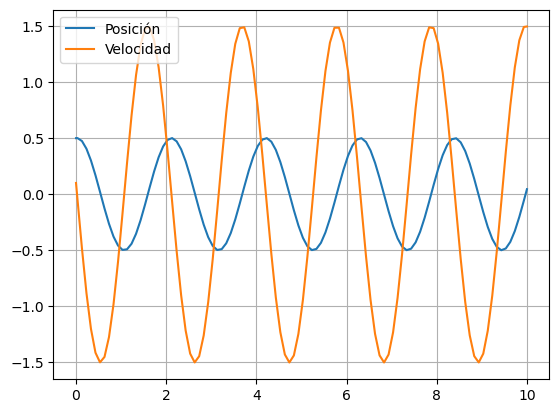

In [39]:
tspan = [0, 10]
w0 = 3
x0 = np.array([0.5, 0.1])
x_ivp = solve_ivp(g, tspan, x0, max_step=0.1)
plt.figure()
plt.plot(x_ivp.t, x_ivp.y[0, :], label="Posición")
plt.plot(x_ivp.t, x_ivp.y[1, :], label="Velocidad")
plt.legend(loc="best")
plt.grid()

Asigne a los parámetros de la solución analítica $C_1=x_0$ y $C_2=\frac{\dot{x}_0}{\omega_0}$.

In [49]:
def posicion(t, w0, x00, v0):
    A = x00
    B = v0/w0
    return A*np.cos(w0*t) + B*np.sin(w0*t)

def velocidad(t, w0, x00, v0):
    A = x00
    B = v0/w0
    return w0*(-A*np.sin(w0*t) + B*np.cos(w0*t))

w0 = 3
x00 = 0.5
v0 = 0.1

t = np.linspace(0, 10, 1000)
x = posicion(t, w0, x00, v0)
v = velocidad(t, w0, x00, v0)

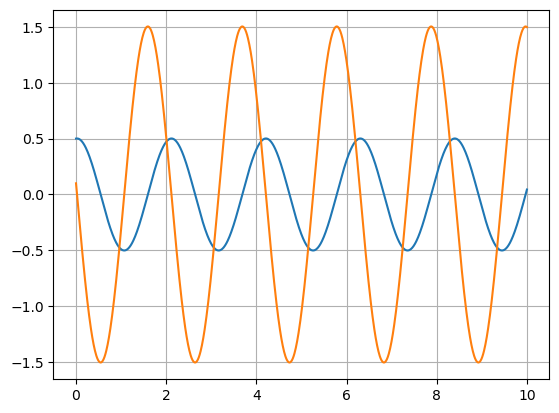

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(t, x, label="Posición")
plt.plot(t, v, label="Velocidad")
plt.grid()

Redefina la función para graficarla (con la palabra reservada ***def***) en un intervalo de tiempo de 0 a 10 segundos. Comparela en un mismo grafico con la solución numérica obtenida.

In [76]:
def grafica(x, t, v, x0, x_ivp):
    plt.figure()
    plt.plot(x_ivp.t, x_ivp.y[0, :], "k", label="Posición numérica", lw=5)
    plt.plot(x_ivp.t, x_ivp.y[1, :], "k", label="Velocidad numérica", lw=5)
    plt.plot(t, x, "y", label = "Posición analítica")
    plt.plot(t, v, "y", label = "Velocidad analítica")
    plt.legend(loc="best")
    plt.grid()

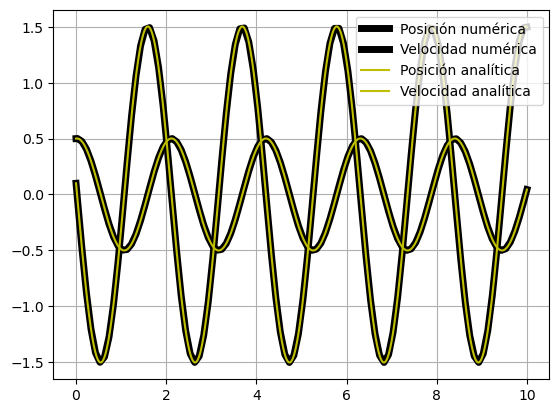

In [77]:
grafica(x, t, v, x0, x_ivp)